# Testing: Arenstorf-Orbit


In [1]:
# load modules with code for adaptive solvers
include("adaptive-extrapolation-Deuflhard.jl") # implementation based on Deuflhard's ideas
include("adapative-extrapolation-Hairer&Wanner.jl"); # implementation based on Hairer and Wanner's ideas
using Plots;

In [2]:
# define problem
# cf.(0.1),(0.2) in  E. Hairer, G. Wanner, and S. Nørsett. Solving Ordinary Differential Equations I: Nonstiff Problems. 
function arenstorf(t,x)
            dx = zeros(4)
            μ = 0.012277471
            μ′ = 1-μ
            d₁ = ((x[1]+μ)^2 +x[2]^2)^(3/2)
            d₂ = ((x[1]-μ′)^2+x[2]^2)^(3/2)
            dx[1:2] = x[3:4]
            dx[3] = x[1] + 2x[4] - μ′*(x[1]+μ)/d₁ - μ*(x[1]-μ′)/d₂
            dx[4] = x[2] - 2x[3] - μ′*x[2]/d₁ -μ*x[2]/d₂
            return dx
end
t₀ = 0.0
x₀ = [ 0.994, 0.0, 0.0, -2.00158510637908252240537862224]
tEnd = 17.0652165601579625588917206249;

In [3]:
# a custom function for the plots
function plotArenstorfOrbit(xΔD,xΔHW,titleStr)
    plt = plot(title = titleStr,lims = [-1.2,1.2], size = (800,600),legend = :topright)
    #plot approximations
    labelD = "D. $(length(xΔD[1,:])-1) steps" 
    labelHW = "H.& W. $(length(xΔHW[1,:])-1) steps"
    plot!(plt,xΔHW[1,:],xΔHW[2,:],linewidth=1,markershape = :circle, markersize = 2,label =labelHW)
    plot!(plt,xΔD[1,:],xΔD[2,:],linewidth=1,markershape = :xcross, markersize = 2,label =labelD)

    #plot earth and moon
    plot!(plt,[0],[0], linealpha = 0, markershape = :circle, markersize = 4, color = :blue, label = "Earth")
    plot!(plt,[1],[0], linealpha = 0, markershape = :star5, markersize = 4,color = :yellow, label = "Moon")
end;

In [4]:
# initialize solvers
N_max = 10
solverD = AdaptiveExtrapolationD.solver( N_max,"Harmonic")
solverHW = AdaptiveExtrapolationHW.solver( N_max,"Harmonic");

## Plot of the Approximated Orbit

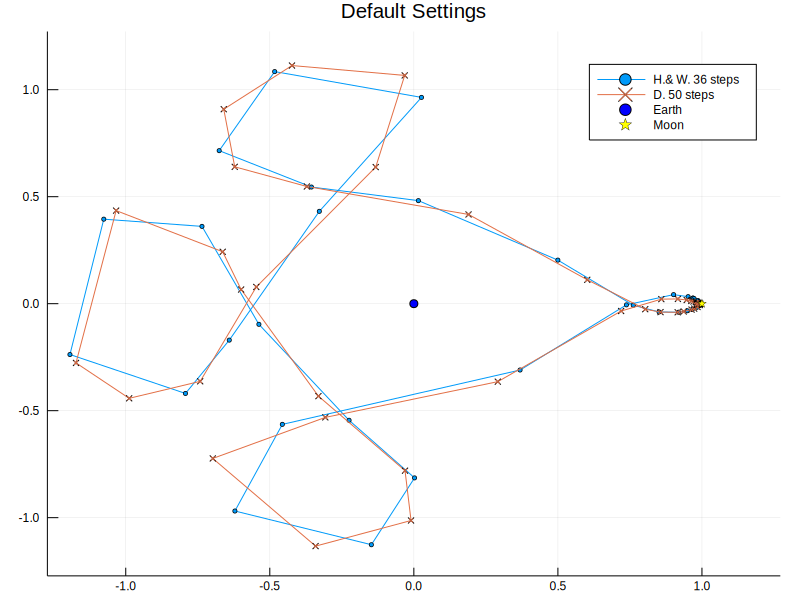

In [5]:
# compute and plot
D = solverD(arenstorf,x₀,t₀,tEnd; detailedStatistics = true)
HW = solverHW(arenstorf,x₀,t₀,tEnd; detailedStatistics = true)
plotArenstorfOrbit(D[2],HW[2], "Default Settings")

In [6]:
# plot stepsize and order
# another custom function
function plotOrderAndStepsize(ΔD,xΔD,detailedStatisticD,ΔHW,xΔHW,detailedStatisticHW)
    orderD = detailedStatisticD[1,:]; push!(orderD, NaN) # last point in Δ has no order...
    orderHW = detailedStatisticHW[1,:]; push!(orderHW, NaN)
    stepsizeD = detailedStatisticD[2,:]; push!(stepsizeD, NaN)
    stepsizeHW = detailedStatisticHW[2,:]; push!(stepsizeHW, NaN)
    # setup subplots
    plt = plot(layout = (3,1), size = (800,600))
    #makeup
    plot!(plt, subplot =1, xlabel = "t", ylabel = "x1,x2", title = "solution",legend = false)
    plot!(plt, subplot =2, xlabel = "t", ylabel = "order", ylims = [1,10],legend = :top)
    plot!(plt, subplot =3, xlabel = "t", ylabel = "stepsize",legend = false)
    # plot solution
    plot!(plt, subplot = 1,ΔD, xΔD[1:2,:]', markershape = :circle)
    plot!(plt, subplot = 1,ΔHW,xΔHW[1:2,:]', markershape = :xcross)
    # plot order
    plot!(plt, subplot = 2, ΔHW, orderHW, markershape = :circle, label = "H.&W.")
    plot!(plt, subplot = 2, ΔD, orderD, markershape = :xcross, label = "D.", )
    #plot stepsize
    plot!(plt, subplot = 3, ΔHW, stepsizeHW)
    plot!(plt, subplot = 3, ΔD, stepsizeD)
end;

## Plot of Order and Stepsize

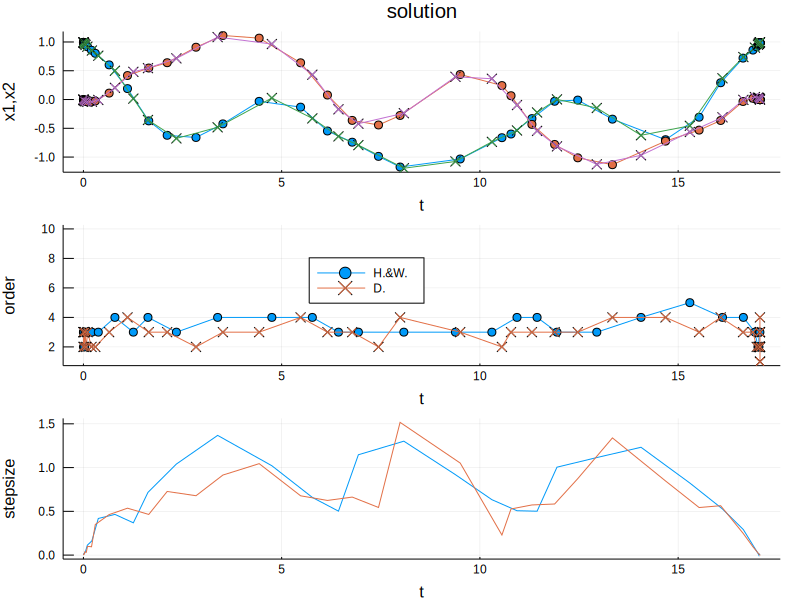

In [7]:
plotOrderAndStepsize(D...,HW...)